In [28]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [29]:
X,y = make_classification(n_samples=100,n_classes=2,n_features=2,n_redundant=0,n_informative=1,n_clusters_per_class=1,hypercube=False,random_state=41,class_sep=20)

In [30]:
X.shape

(100, 2)

In [31]:
def sigmoid(val):
    return 1 / (1 + np.exp(-val))

In [41]:
def Gd(X,y):
    lr = 0.5
    X = np.insert(X, 0, 1 ,axis=1)
    weights = np.ones(X.shape[1])
    
    for i in range(100000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr *(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[0], weights[1:]

In [42]:
intercept, coeff_ = Gd(X,y)

In [43]:
m = - ( coeff_[0] / coeff_[1] )
b = - ( intercept / coeff_[1] )

In [44]:
x_input = np.linspace(-3,3,100)
y_input = m * x_input + b

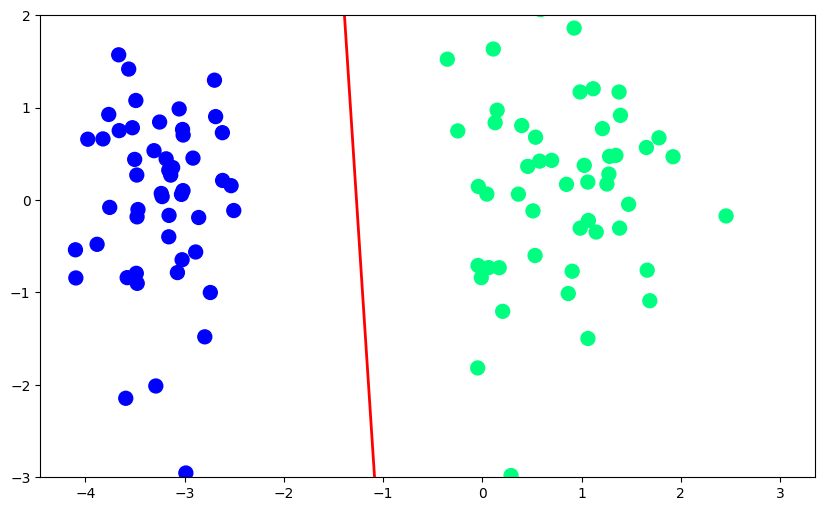

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input,y_input,c='r',linewidth=2)
plt.ylim(-3,2)
plt.show()


In [46]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(solver='sag')
lor.fit(X,y)

LogisticRegression(solver='sag')

In [47]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [48]:
y_input_1 = m1*x_input + b1

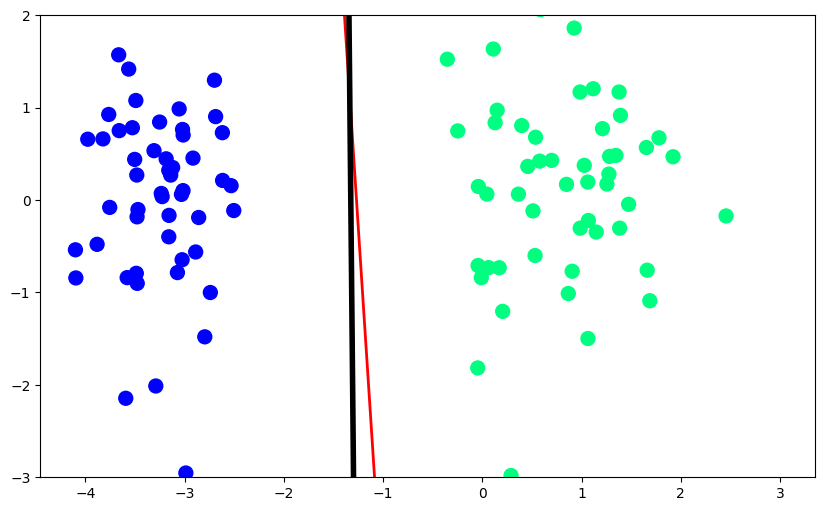

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input,y_input,c='r',linewidth=2)
plt.plot(x_input,y_input_1,c='black',linewidth=4)
plt.ylim(-3,2)
plt.show()